# Importing Header and SoilPrep

In [1]:
import import_ipynb 
from Header import *

importing Jupyter notebook from Header.ipynb


In [2]:
import import_ipynb
from SoilPrep import * 

importing Jupyter notebook from SoilPrep.ipynb


# Step 0: Setting up decision parameters (Data Tree)

In [3]:
# 0. Available smoothing filter types: savgol1 and savgol2 ------------------------ (0)
sg_filters = ['sg2']

# 0. Available window lengths for the smoothing filter ---------------------------- (0)
window_lengths = [0, 1, 11, 21, 31, 41, 51, 71, 91]

# 1. Available machine learning regression models --------------------------------- (1)
ml_methods = ['ridge', 'svr', 'plsr', 'cubist', 'gbrt']

# 2. Names of target variables in the dataframe ----------------------------------- (2)
target_names = ['Silt']

# 3. Available preprocessing for Target data -------------------------------------- (3)
prepare_target = ['none']
# 4. Available preprocessing for Spectral data ------------------------------------ (4)
prepare_spec = ['none', 'cr', 'log', 'fod', 'fod_cr', 'fod_log']

# 5. Resampling bands available for spectra --------------------------------------- (5) 
nbands_sampling = [5,10,15,20,25,30,35, 40, 45, 50, 60, 70, 80, 90, 100]

# Setting colours for different targets        --------------------------------------
clr = ['#F4A460', '#8B7355', '#A52A2A']

# Colour scheme definition
kado = '#8B7355'
mati = '#A52A2A'
balu = '#F4A460'

In [4]:
MetaData = {'sg_filters' : sg_filters, 'window_lengths' : window_lengths, 'prepare_spec' : prepare_spec, \
            'nbands_sampling' : nbands_sampling, 'target_names' : target_names, 'prepare_target' : prepare_target,\
            'ml_methods' : ml_methods, 'clr' : clr}

with open ('meta_data.pickle', 'wb') as file:
    pickle.dump(MetaData, file)

## Step 0- Data Imputation

In [5]:
df = pd.read_csv('Italy.csv')
df.rename(columns = {'Clay%': 'Clay', 'Silt%': 'Silt', 'Sand%': 'Sand'}, inplace = True)
df.head(1)

,TLV_idx,IT_idx,TAG_IT,XmUTM33,YmUTM33,soil depth (cm),average soil depth (cm),Texture class,Sand,Silt,Clay,BD g/cm3,pH,CaCO3%,OC%,Carbon stock,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,...,2451,2452,2453,2454,2455,2456,2457,2458,2459,2460,2461,2462,2463,2464,2465,2466,2467,2468,2469,2470,2471,2472,2473,2474,2475,2476,2477,2478,2479,2480,2481,2482,2483,2484,2485,2486,2487,2488,2489,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,1,126629.0,C2_4664,502765.35,4488814.14,0-7,3.5,sandy loam,47.75,27.62,24.63,1.506327,6.3,5.863,1.4,0.007381,0.074932,0.07695,0.069572,0.074459,0.084597,0.082278,0.084486,0.084062,0.078833,0.064853,0.065676,0.08092,0.078477,0.074822,0.073595,0.079095,0.073128,0.067866,0.073805,0.075564,0.077744,0.079301,0.076749,0.075715,0.078941,0.080916,0.076129,0.07307,0.077287,0.08146,0.081923,0.080122,0.079522,0.078779,...,0.389512,0.389017,0.388596,0.388203,0.387496,0.386679,0.385995,0.385343,0.384979,0.384798,0.384509,0.383982,0.383455,0.382667,0.381661,0.381222,0.380977,0.380462,0.38002,0.379234,0.377965,0.377186,0.376435,0.376151,0.37586,0.375003,0.374733,0.374094,0.373085,0.372541,0.371912,0.371266,0.370933,0.370718,0.370055,0.368958,0.368165,0.367614,0.367514,0.367988,0.368236,0.368705,0.368515,0.367891,0.367332,0.365998,0.365176,0.364963,0.365163,0.36501


In [6]:
temp_spec = df.iloc[:, 16::].copy()
spectra_df = temp_spec.iloc[:,50::].copy()
target_df = df.loc[:, [target_names[0]]].copy()

In [7]:
spectra_df.head(2)

,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,...,2451,2452,2453,2454,2455,2456,2457,2458,2459,2460,2461,2462,2463,2464,2465,2466,2467,2468,2469,2470,2471,2472,2473,2474,2475,2476,2477,2478,2479,2480,2481,2482,2483,2484,2485,2486,2487,2488,2489,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,0.086050,0.088625,0.088922,0.088726,0.089113,0.088972,0.088203,0.087449,0.088015,0.089710,0.091106,0.090524,0.091880,0.092508,0.091135,0.092036,0.092789,0.093127,0.093511,0.094088,0.094568,0.094474,0.095251,0.096410,0.097614,0.097859,0.098206,0.099107,0.099170,0.099204,0.099553,0.100929,0.102627,0.103838,0.104182,0.104811,0.105346,0.105437,0.105945,0.106878,0.107915,0.108362,0.108999,0.109905,0.110684,0.111204,0.111684,0.112573,0.113481,0.113694,...,0.389512,0.389017,0.388596,0.388203,0.387496,0.386679,0.385995,0.385343,0.384979,0.384798,0.384509,0.383982,0.383455,0.382667,0.381661,0.381222,0.380977,0.380462,0.380020,0.379234,0.377965,0.377186,0.376435,0.376151,0.375860,0.375003,0.374733,0.374094,0.373085,0.372541,0.371912,0.371266,0.370933,0.370718,0.370055,0.368958,0.368165,0.367614,0.367514,0.367988,0.368236,0.368705,0.368515,0.367891,0.367332,0.365998,0.365176,0.364963,0.365163,0.365010
1,0.125223,0.128504,0.129120,0.128924,0.129251,0.129067,0.128753,0.128626,0.129218,0.130684,0.132027,0.131676,0.133955,0.135213,0.133668,0.134791,0.135950,0.136851,0.137534,0.138047,0.138528,0.138977,0.140021,0.141322,0.142934,0.143437,0.144069,0.145405,0.145694,0.146237,0.147058,0.148308,0.149947,0.151392,0.152344,0.153188,0.153987,0.154531,0.154996,0.156035,0.157450,0.158115,0.159066,0.160308,0.161186,0.161913,0.162628,0.163770,0.164859,0.165325,...,0.470734,0.470214,0.469700,0.469578,0.469052,0.468403,0.468044,0.467167,0.466103,0.465645,0.465378,0.464997,0.464733,0.464414,0.463514,0.462855,0.462880,0.462100,0.461291,0.461049,0.460534,0.460264,0.459630,0.459034,0.458453,0.457710,0.457637,0.457607,0.456742,0.455889,0.455544,0.454833,0.454801,0.455204,0.454618,0.453573,0.452215,0.451102,0.450939,0.452055,0.452472,0.452662,0.452495,0.451723,0.450718,0.449806,0.448387,0.447150,0.447417,0.446394


In [8]:
nan_row_idx_spec =spectra_df.isnull().any(axis=1)
nan_row_idx_target =target_df.isnull().any(axis=1)
nan_rows_bool = nan_row_idx_target | nan_row_idx_spec

In [9]:
spectra_df[nan_rows_bool]

,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,...,2451,2452,2453,2454,2455,2456,2457,2458,2459,2460,2461,2462,2463,2464,2465,2466,2467,2468,2469,2470,2471,2472,2473,2474,2475,2476,2477,2478,2479,2480,2481,2482,2483,2484,2485,2486,2487,2488,2489,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
623,0.142391,0.147142,0.146884,0.147488,0.150585,0.148252,0.14875,0.151246,0.150011,0.151123,0.153296,0.153048,0.152817,0.153627,0.155045,0.155439,0.15526,0.155807,0.157453,0.158504,0.158932,0.159178,0.160602,0.162059,0.163228,0.164402,0.165257,0.166177,0.167464,0.169245,0.17084,0.171992,0.173357,0.17444,0.175086,0.177034,0.179058,0.180074,0.181243,0.182816,0.18454,0.185647,0.186995,0.188311,0.18864,0.18947,0.190741,0.192428,0.193313,0.194303,...,0.445529,0.444962,0.444127,0.443574,0.442817,0.441668,0.440754,0.440083,0.439517,0.439282,0.439276,0.438674,0.437809,0.436965,0.435876,0.435379,0.434987,0.434483,0.434315,0.433631,0.432889,0.432582,0.431673,0.430843,0.430307,0.429521,0.428946,0.428356,0.42768,0.427242,0.426799,0.426425,0.425745,0.424578,0.423679,0.423297,0.422875,0.422415,0.421885,0.42115,0.420771,0.420323,0.420073,0.419898,0.419615,0.419876,0.419632,0.419065,0.418822,0.419057
801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
target_df[nan_rows_bool]


,Silt
623,NaN
801,49.21


# Step 1a: Obtaining Spectra (Noise and Outliers removal)

In [11]:
spectra = spectra_df[~nan_rows_bool].copy()
target = target_df[~nan_rows_bool].copy()

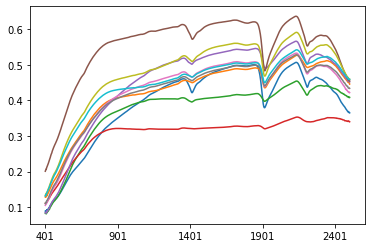

In [12]:
for i in range (0,10,1):
    spectra.iloc[i,1:].plot()

# Step 1b: Obtaining Targets (Isolating as series)

In [13]:
clr = ['#F4A460', '#8B7355', '#A52A2A']

def isolate_targets(target, target_names):
    T=[]
    for i in range (0,len(target_names)):
        T.append(target[target_names[i]])
    return(T)
    
T = isolate_targets(target,target_names)

# Step 1c: Spectra Preprocessing (Smooth, FOD/Contin/Log , and Resample)

In [14]:
#halt here

## Savgol smoothing (order 2)

In [15]:
# -------------- Smoothed Spectra  spec2 (savgol order 2)  -----------

spec2 = {}
for i in window_lengths:
    spec2[i] = filt_sg(spectra, i, 'sg2')

smth_spec = sgsmooth (spectra, 3)    

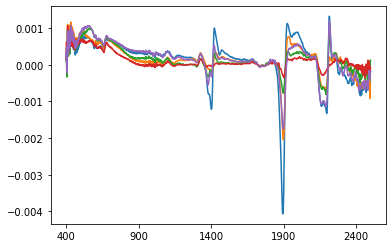

In [16]:
fod_spec = fod(smth_spec)

for i in range (0,5,1):
    fod_spec.iloc[i,:].plot()


## Continuum Removal

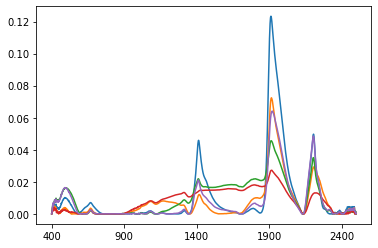

In [17]:
cr_spec = continuum_removed(spec2[51])

for i in range (0,5,1):
    cr_spec.iloc[i,:].plot()
    

## log(1/R) Transformation

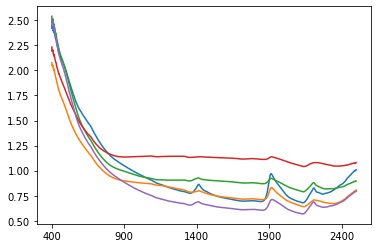

In [18]:
log_spec = ((1/spec2[51]).apply(np.log)).copy()
#log_spec.head(5)

for i in range (0,5,1):
    log_spec.iloc[i,:].plot()   

## Resampling (n_bands)

### 1. Sampled Original (sampled_spec)

### 2. Sampled Continuum Removed  (sampled_cr)

### 3. Sampled Log (sampled_log)

In [19]:
sampled_spec = {}
sampled_cr = {}
sampled_log = {}
for n in nbands_sampling:
    sampled_spec[n] = resample_spectra (spec2[51], n)
    sampled_cr[n] = resample_spectra (cr_spec, n)
    sampled_log[n] = resample_spectra (log_spec, n)

### 4.  FOD of sampled spectra (fod_sampled)

### 5. FOD of sampled_cr (fod_sampledcr)

### 6. FOD of sampled_log (fod_sampledlog)

In [20]:
fod_sampled = {}
fod_cr = {}
fod_log = {}
for n in nbands_sampling:
    fod_sampled[n] = fod (sampled_spec[n])
    fod_cr[n] = fod (sampled_cr[n])
    fod_log[n] = fod (sampled_log[n])

## Visualizing Processed Spectrum (variable samples)

In [21]:
(row, col) = spectra.shape
(row, col)

(934, 2101)

In [22]:
def plot_spec (sample, process):
    (row, col) = spectra.shape
    x1 = spec2[51].iloc[sample,:]
    x1.plot()
    if process == 'cr':
        x2 = cr_spec.iloc[sample,:]
        x2.plot()
    elif process == 'log':
        x3 = log_spec.iloc[sample,:]/3
        x3.plot()
    else:
        x4 = fod_spec.iloc[sample,:]*100
        x4.plot()
        
    plt.ylim([-0.6, 0.9])

ipywidgets.interact(plot_spec, sample = (0, row, 1), process = prepare_spec)

interactive(children=(IntSlider(value=467, description='sample', max=934), Dropdown(description='process', opt…

<function __main__.plot_spec(sample, process)>

## Correlation between wavelengths and Targets

In [23]:
def find_rpval (spectra, tar):
    (r, c) = spectra.shape
    
    r_val = spectra.iloc[[0], :].copy()
    p_val = spectra.iloc[[0], :].copy()
    
    for j in range(0, c):
        #print("Length of tar:", len(tar))
        #print("Length of spectra.iloc[:, j]:", len(spectra.iloc[:, j]))

        r_val.iloc[0,j], p_val.iloc[0,j] = stats.pearsonr(tar, spectra.iloc[:, j])
    
    return(r_val, p_val)


In [24]:
plt.style.use(['science','notebook','grid'])

def plot_corr (target, prepare, n_bands):
    
    i = target_names.index(target)    
    
    if  prepare == 'none':
        r_val, p_val = find_rpval (sampled_spec[n_bands], T[i])
        r_val.iloc[0,:].plot(color = clr[i])
    elif  prepare == 'cr':
        r_cr, p_cr = find_rpval (sampled_cr[n_bands], T[i])
        r_cr.iloc[0,:].plot(color = clr[i])
    elif prepare == 'log':
        r_log, p_log = find_rpval (sampled_log[n_bands], T[i])
        r_log.iloc[0,:].plot(color = clr[i])
    elif prepare == 'fod_spec':    
        r_fod, p_fod = find_rpval (fod_sampled[n_bands], T[i])
        r_fod.iloc[0,:].plot(color = clr[i]) 
    elif prepare == 'fod_cr':    
        r_sfodcr, p_sfodcr = find_rpval (fod_cr[n_bands], T[i])
        r_sfodcr.iloc[0,:].plot(color = clr[i]) 
    else:   
        r_sfodlog, p_sfodlog = find_rpval (fod_log[n_bands], T[i])
        r_sfodlog.iloc[0,:].plot(color = clr[i]) 
    
    plt.ylim([-0.9, 0.9])
    plt.show()

ipywidgets.interact(plot_corr, target = target_names, prepare = prepare_spec, n_bands = nbands_sampling)



interactive(children=(Dropdown(description='target', options=('Silt',), value='Silt'), Dropdown(description='p…

<function __main__.plot_corr(target, prepare, n_bands)>

In [25]:
Data = {'spectra' : spec2[51], 'T' : T, 'spec2': spec2, 'smth_spec' : smth_spec, 'fod_spec' : fod_spec,  \
       'cr_spec' : cr_spec,  'log_spec' : log_spec, 'sampled_spec' : sampled_spec, 'sampled_cr' : sampled_cr, \
        'fod_sampled' : fod_sampled, 'sampled_log' : sampled_log, 'fod_cr' : fod_cr, 'fod_log' : fod_log}

In [26]:
with open ('data.pickle', 'wb') as file:
    pickle.dump(Data, file)